Cho dữ liệu **champagne_new.xlsx** là dữ liệu bán champagne theo thời gian từ tháng 01-1964 đến tháng 09-1972   
Yêu cầu: Đọc dữ liệu, chuẩn hóa dữ liệu (nếu cần) và **chọn một thuật toán Time Series thích hợp** để thực hiện việc **dự đoán số tiền champagne bán được của 9 tháng tiếp theo** từ tháng 10-1972 đến tháng 06-1973 giá trị dựa trên các thông tin được cung cấp   
1. Thực hiện Decomposition, trực quan hóa, nhận xét.    
2. Tạo dữ liệu train/test với train chiếm 75% dữ liệu, test chiếm 25% dữ liệu.   
3. Áp dụng thuật toán phù hợp.   
4. Tìm kết quả.    
5. Trực quan hóa kết quả (trong biểu đồ có cả train, test, predict và next_9_months) như gợi ý 

 **----------------------------------------------------  DATA OVERVIEW  ----------------------------------------------------------**

In [56]:
import pandas as pd
data = pd.read_excel('du lieu cung cap/champagne_new.xlsx', index_col = 0)

In [57]:
print('Number of rows:',data.shape[0])
print('Number of columns:',data.shape[1])

Number of rows: 105
Number of columns: 1


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 105 entries, 1964-01-01 to 1972-09-01
Data columns (total 1 columns):
monthly_champange    105 non-null int64
dtypes: int64(1)
memory usage: 1.6 KB


In [59]:
data.head()

,monthly_champange
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


In [60]:
data.index = pd.to_datetime(data.index)

In [61]:
import matplotlib.pyplot as plt

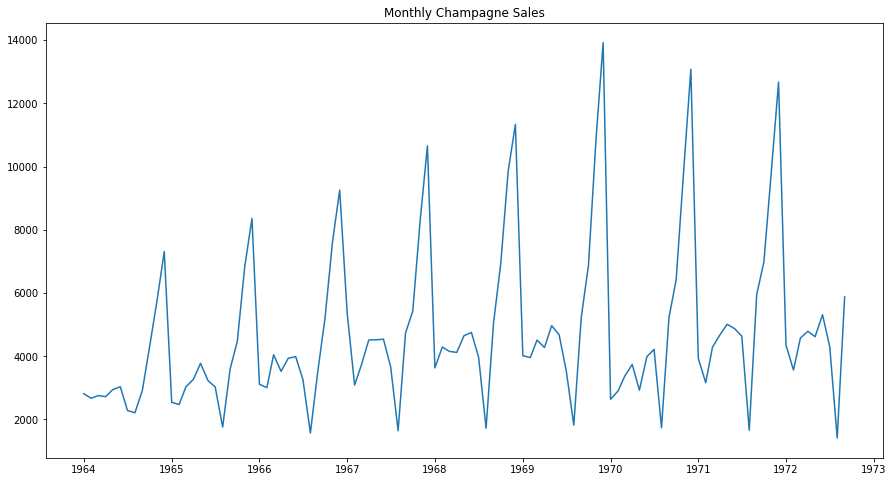

In [62]:
plt.figure(figsize=(15,8)) 
plt.plot(data) 
plt.title("Monthly Champagne Sales") 
plt.show()

**1. Thực hiện Decomposition, trực quan hóa, nhận xét.**

In [63]:
from statsmodels.tsa.seasonal import seasonal_decompose 
result = seasonal_decompose(x = data, model='multiplicative') 
result

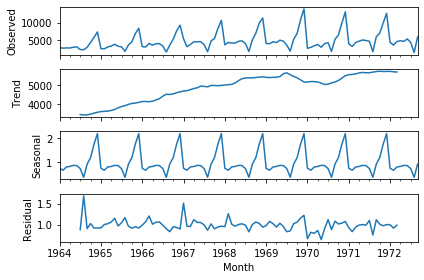

In [64]:
result.plot() 
plt.show()

**Decomposition:**   
1. Trend (chuyển động lên hoặc xuống của đường cong dài hạn (long term)  
    - Có xu hướng tăng từ năm 1964 đến giữa năm 1969 thì giảm và sau có có tăng nhẹ trở lại từ năm 1971
2. Seasonal component (thành phần theo mùa) 
    - Cho thấy doanh số thường tăng vào quý 4 hằng năm, sau đó bắt đầu giảm từ quý 1 đến quý 3
3. Residuals (thành phần còn lại)
    - Ảnh hưởng bởi các yếu tố khác không thường xuyên, có 1 vài tháng ở vài năm bị ảnh hưởng


**2. Tạo dữ liệu train/test với train chiếm 75% dữ liệu, test chiếm 25% dữ liệu.**

In [65]:
from pmdarima.arima import auto_arima
stepwise_model = auto_arima(data, start_p=2, start_q=2,
                            max_p=5, max_q=5, m=12,
                            start_P=1, seasonal=True,
                            d=1, D=1, trace=True,
                            error_action='ignore',
                            suppress_warnings=True,
                            stepwise=True)

Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 1, 1, 12); AIC=1487.266, BIC=1507.440, Fit time=1.013 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=1526.661, BIC=1531.705, Fit time=0.012 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=1509.055, BIC=1519.143, Fit time=0.243 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1490.560, BIC=1500.647, Fit time=0.357 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 1, 1, 12); AIC=1490.027, BIC=1507.680, Fit time=0.885 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(2, 1, 1, 12); AIC=1491.472, BIC=1514.168, Fit time=2.556 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 1, 0, 12); AIC=1485.543, BIC=1503.195, Fit time=0.887 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(1, 1, 0, 12); AIC=1486.711, BIC=1501.841, Fit time=0.785 seconds
Fit ARIMA: order=(3, 1, 2) seasonal_order=(1, 1, 0, 12); AIC=1487.519, BIC=1507.693, Fit time=0.987 seconds
Fit ARIMA: order=(2, 1, 1) s

In [66]:
train = data.loc['1964-01-01':'1970-07-01']  # 75% data
test = data.loc['1970-08-01': ] # 25% data

**3. Áp dụng thuật toán phù hợp**  
**4. Tìm kết quả**

 **------------------------------------------------------ ARIMA -------------------------------------------------------**

In [67]:
stepwise_model.fit(train)

ARIMA(callback=None, disp=0, maxiter=None, method=None, order=(1, 1, 1),
      out_of_sample_size=0, scoring='mse', scoring_args={},
      seasonal_order=(1, 1, 0, 12), solver='lbfgs', start_params=None,
      suppress_warnings=True, transparams=True, trend=None,
      with_intercept=True)

In [68]:
future_forecast = stepwise_model.predict(n_periods=len(test))
future_forecast                                  

C:\Users\thao.nguyenpl\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)


array([ 1856.42677736,  5118.22564271,  6750.35660775, 10571.7698335 ,
       13520.48694023,  2586.82085108,  2802.93387609,  3266.35929151,
        3566.71798248,  2874.90931162,  3796.7679728 ,  3887.4597236 ,
        1571.48970139,  4830.89671123,  6449.65716215, 10265.99889597,
       13214.59365479,  2234.87382961,  2439.97055757,  2889.09397207,
        3180.76673075,  2463.00475604,  3382.28518278,  3470.68525504,
        1135.69195777,  4380.3280107 ])

In [69]:
future_forecast = pd.DataFrame(future_forecast,
                               index = test.index,
                               columns=['Prediction'])

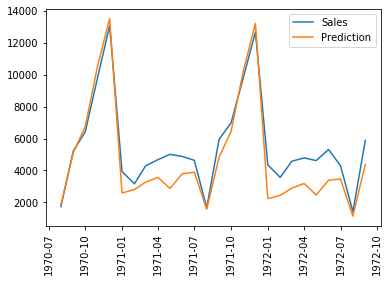

In [70]:
plt.plot(test, label='Sales') 
plt.plot(future_forecast, label='Prediction') 
plt.xticks(rotation='vertical') 
plt.legend() 
plt.show()

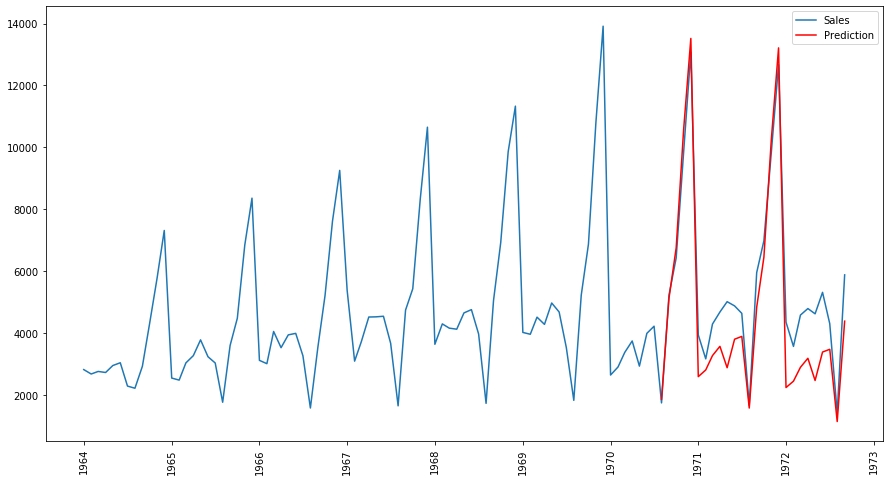

In [71]:
plt.figure(figsize=(15,8)) 
plt.plot(data, label='Sales') 
plt.plot(future_forecast, label='Prediction', color='red') 
plt.xticks(rotation='vertical') 
plt.legend() 
plt.show()

 **------------------------------------------------------ HOLTWINTERS -------------------------------------------------------**

In [109]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(train, seasonal='mul', seasonal_periods=12).fit()
pred = model.predict(start=test.index[0], end=test.index[-1])

C:\Users\thao.nguyenpl\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


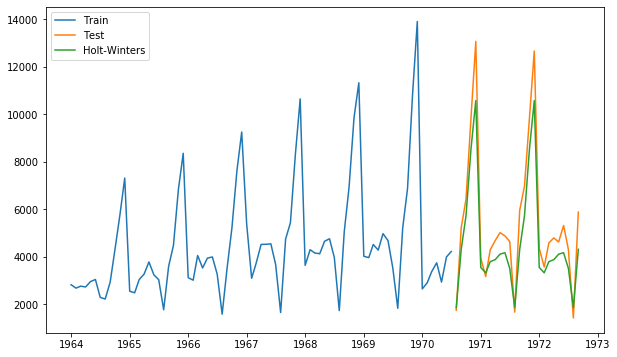

In [110]:
plt.figure(figsize=(10,6)) 
plt.plot(train.index, train, label='Train') 
plt.plot(test.index, test, label='Test') 
plt.plot(pred.index, pred, label='Holt-Winters') 
plt.legend(loc='best')


**5. Trực quan hóa kết quả (trong biểu đồ có cả train, test, predict và next_9_months)**

In [100]:
future_forecast_9 = stepwise_model.predict(n_periods=len(test)+9) 
future_forecast_9 = future_forecast_9[-9:]

C:\Users\thao.nguyenpl\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)


In [102]:
future_forecast_9 = pd.DataFrame(future_forecast_9,
                               index = ['1972-10-01'
                                       ,'1972-11-01'
                                       ,'1972-12-01'
                                       ,'1973-01-01'
                                       ,'1973-02-01'
                                       ,'1973-03-01'
                                       ,'1973-04-01'
                                       ,'1973-05-01'
                                       ,'1973-06-01'],
                               columns=['Prediction'])

In [103]:
future_forecast_9

,Prediction
1972-10-01,5985.310902
1972-11-01,9787.124144
1972-12-01,12720.742591
1973-01-01,1730.202527
1973-02-01,1921.308675
1973-03-01,2356.738814
1973-04-01,2634.210132
1973-05-01,1903.809143
1973-06-01,2808.335477


In [107]:
future_forecast_9.index = pd.to_datetime(future_forecast_9.index)

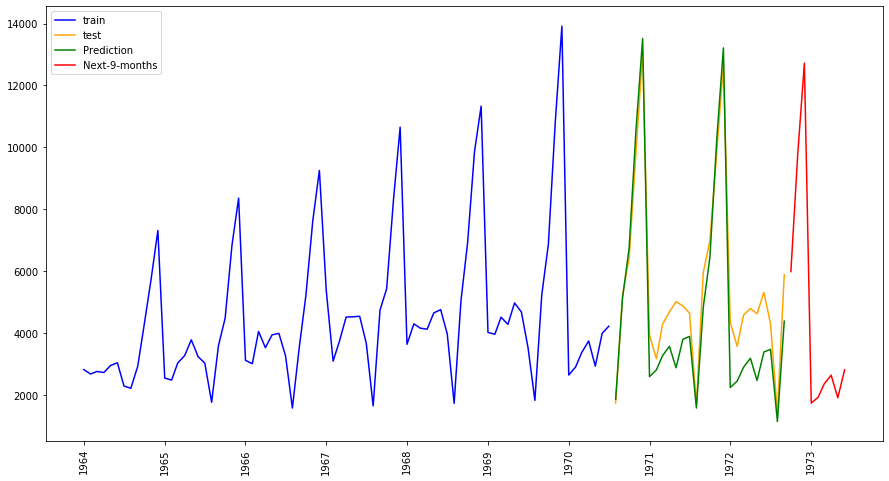

In [108]:
plt.figure(figsize=(15,8)) 
plt.plot(train, label='train', color = 'blue')
plt.plot(test, label='test', color = 'orange')
plt.plot(future_forecast, label='Prediction', color='green') 
plt.plot(future_forecast_9, label='Next-9-months', color='red') 
plt.xticks(rotation='vertical') 
plt.legend() 
plt.show()